<a href="https://colab.research.google.com/github/saqib-rgb/ML-With-Pytorch/blob/main/PyTorch_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch custom datasets

## 0. Importing PyTorch and setting up device-agnostic code

In [1]:
import torch
from torch import nn

# checking the version of PyTorch
torch.__version__

'2.0.0+cu118'

In [2]:
# set up device agnostic code
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## 1. Downloading a custom datset

In [3]:
import requests
import zipfile
from pathlib import Path

# set up path to a data folder
data_path=Path('data/')
image_path=data_path/'pizza_steak_sushi'

if image_path.is_dir():
  print(f'{image_path}  directory already exists...skipping download')
else:
  print(f'{image_path} doesnot exist...craeting one...')
  image_path.mkdir(parents=True,exist_ok=True)

# download data
with open(data_path/'pizza_steak_sushi.zip','wb') as f:
  request=requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
  print('Downloading data....')
  f.write(request.content)

# unzip 
with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip','r') as zip_ref:
  print('Unzipping_file')
  zip_ref.extractall(image_path)


data/pizza_steak_sushi doesnot exist...craeting one...
Unzipping_file


## 2. exploring data(data preparation)

In [4]:
import os
def walk_through_dir(dir_path):
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f'There are {len(dirnames)} directories and{len(filenames)} images in {dirpath}')
    

In [5]:
walk_through_dir(image_path)

There are 2 directories and0 images in data/pizza_steak_sushi
There are 3 directories and0 images in data/pizza_steak_sushi/train
There are 0 directories and78 images in data/pizza_steak_sushi/train/pizza
There are 0 directories and75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and72 images in data/pizza_steak_sushi/train/sushi
There are 3 directories and0 images in data/pizza_steak_sushi/test
There are 0 directories and25 images in data/pizza_steak_sushi/test/pizza
There are 0 directories and19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and31 images in data/pizza_steak_sushi/test/sushi


In [6]:
# setup train and testing path
train_dir=image_path/'train'
test_dir=image_path/'test'

train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing an image
1. get all the if
2. pich a random imagepath
3. get image class name using `pathlib.Path.parent.stem`
4. let us open image with pytorch
5. show imgage

data/pizza_steak_sushi/train/pizza/3196721.jpg
pizza
Random Image path:data/pizza_steak_sushi/train/pizza/3196721.jpg
image class:pizza
Image height:384
Image width:512


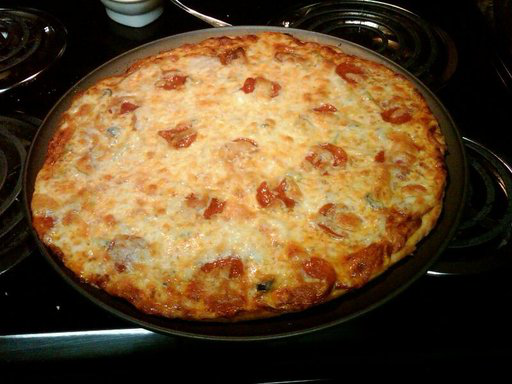

In [7]:
import random
from PIL import Image

# set random seed
random.seed(42)

# get all image path
image_path_list=list(image_path.glob('*/*/*.jpg'))

# random image path
random_image_path=random.choice(image_path_list)
print(random_image_path)

# get image class
image_class=random_image_path.parent.stem
print(image_class)

# open image
img=Image.open(random_image_path)

# print metadata
print(f'Random Image path:{random_image_path}')
print(f'image class:{image_class}')
print(f'Image height:{img.height}')
print(f'Image width:{img.width}')
img

(-0.5, 511.5, 383.5, -0.5)

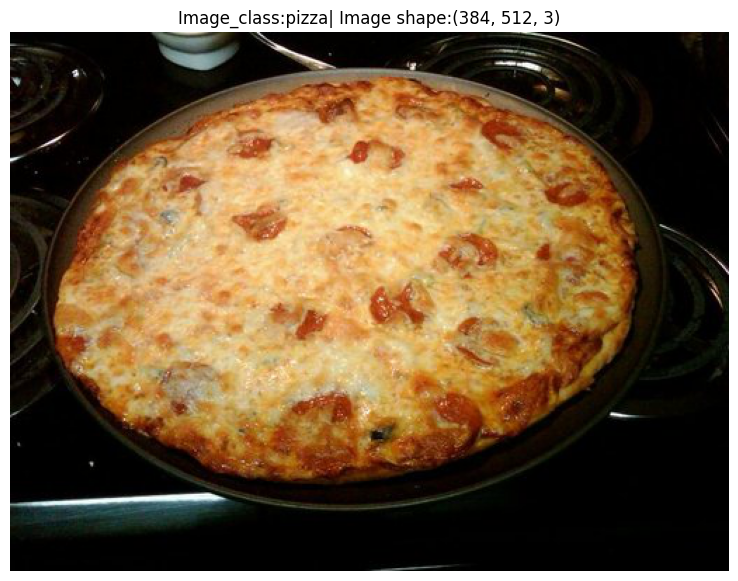

In [8]:
# printing the image using matplotlib
import numpy as np
import matplotlib.pyplot as plt

# turn image into array
image_as_array=np.asarray(img)

# plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(image_as_array)

plt.title(f'Image_class:{image_class}| Image shape:{image_as_array.shape}')
plt.axis(False)


## 3. Transforming data
1. Converting our data into Tensors
2. Turn it into `torch.utils.data.Dataset` and subsequently `torch.utils.data.DataLoader`

In [9]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [10]:
# write a transform image
data_transform=transforms.Compose([
    # Resize our images
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])


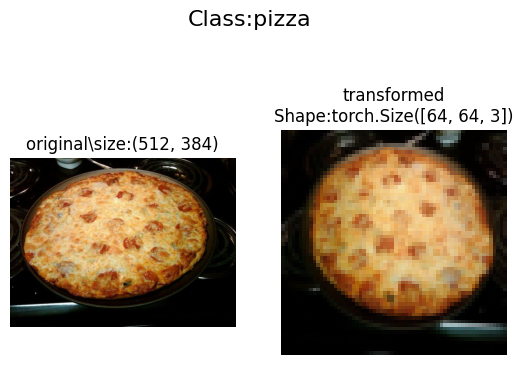

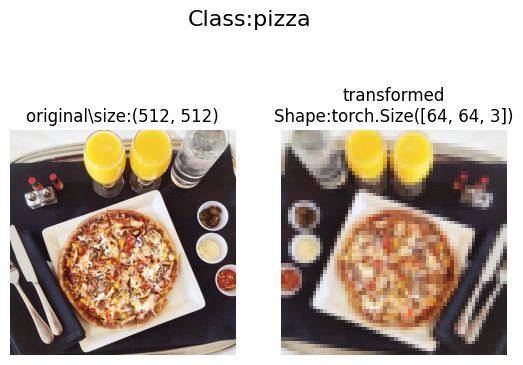

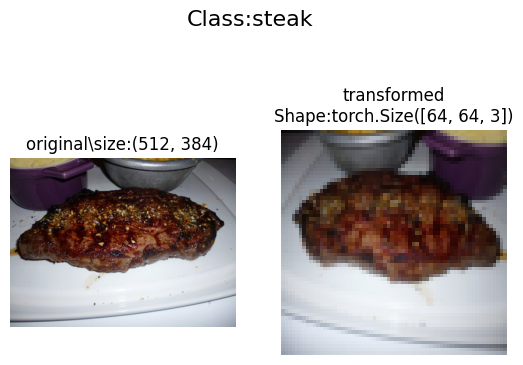

In [11]:
def plot_transformed_images(image_paths:list,transform,n=3,seed=None):
  """
  Selects the random images from path and applies transform 
  """
  if seed:
    random.seed(seed)
  random_image_paths=random.sample(image_paths,k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig,ax=plt.subplots(nrows=1,ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f'original\size:{f.size}')
      ax[0].axis(False)

      #Transform and plot target image
      transformed_image=transform(f).permute(1,2,0) # we will need to do this for matplotlib
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"transformed\nShape:{transformed_image.shape}")
      ax[1].axis('off')

      fig.suptitle(f"Class:{image_path.parent.stem}",fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)



## 4. OPTION 1: LAODING IMAGES USING TORCHVISION IMAGEFOLDER

In [12]:
# USE IMAGE FOLDER
from torchvision import datasets
train_data=datasets.ImageFolder(root=train_dir,
                                transform=data_transform,
                                target_transform=None)
test_data=datasets.ImageFolder(root=test_dir,
                              transform=data_transform)
train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [13]:
# Get class names as list
class_names=train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [14]:
class_dict=train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [15]:
len(train_data),len(test_data)

(225, 75)

In [16]:
# index on the train_data dataset
img,label=train_data[0][0],train_data[0][1]
print(f'Image Tensor:\n{img}')
print(f'Image Shape:{img.shape}')
print(f'Image datatype:{img.dtype}')
print(f'Image label:{label}')
print(f'Label datatype:{type(label)}')

Image Tensor:
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

Original shape:torch.Size([3, 64, 64])
New shape:torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

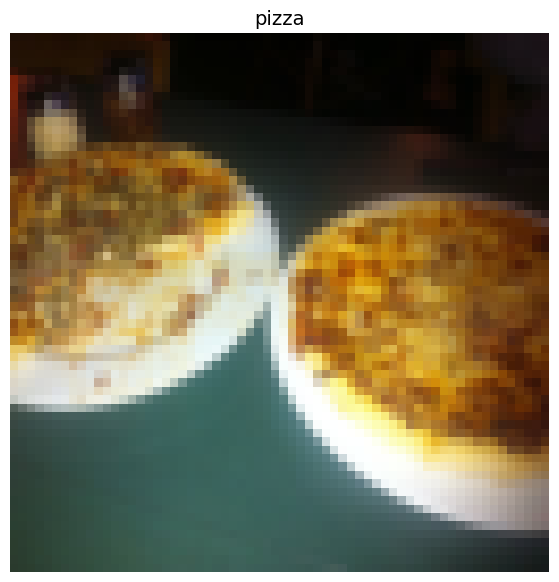

In [17]:
# let us visualize some data 
# but brfore that we need to rearrange our data to be acceptable by matplotlib
img_permute=img.permute(1,2,0)

# print out shapes
print(f'Original shape:{img.shape}')
print(f'New shape:{img_permute.shape}')

# plot thr image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label],fontsize=14)


## 4.1 Turn loaded images to `Dataloaders`

In [18]:
# turn our test and train datsets into image loaders
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            num_workers=os.cpu_count(),
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           num_workers=os.cpu_count(),
                           shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f01b30552b0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f01b30557c0>)

In [19]:
len(train_dataloader),len(test_dataloader)

(8, 3)

In [20]:
img,label=next(iter(train_dataloader))

# batch size will ne now 1
print(f'Image Size:{img.shape}')
print(f'Label shape:{label.shape}')

Image Size:torch.Size([32, 3, 64, 64])
Label shape:torch.Size([32])


## 5 Option 2: Loading image if Imageloader was not available

1. load image from file
2. get class names from thr Dataset
3. get classes as dictionary

pros:
* can create a datset out of almost everything
* not limited to PyTorch pre-built `Dataset` functions

cons:
* even though you could create `Dataset` out of almost everything but it diesnot mean it is going to work
* using custom datset you might have to write a lot of code, which will be prone to errors

In [21]:
#n let us import all the libraries
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple,Dict,List

### 5.1 Creating a helper function to get the class names
1. Get the class names `os.scandir` to traverse a target directory
2. Raise error if thr class names are not found 
3. Turn the class names into dict

In [22]:
# set up path for target directory
target_directory=train_dir
print(f'Target dir:{target_directory}')

# get the class names from the target directory
class_names_found=sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir:data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [23]:
def find_classes(directory:str)->Tuple[List[str],Dict[str,int]]:
  """
  Finds the class folder names in thr target directory
  """
  #1. get the class names byy scanning the target directory
  classes=sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  #2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f'Could not find any classes in {directory}....please check file structure.')
  
  #3. Create a dictionary of index labels 
  class_to_idx={class_name:i for i,class_name in enumerate(classes)}
  return classes,class_to_idx


In [24]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom dataset to replicate `ImageFolder`

To create our own custom dataset we will
1. we will sublass `torch.utils.data.datset`
2. Init our subclass with a target directory as well as transform if we would like to use
3. Create several attributes
   * paths
   * Transform
   * Classes
   * Class_to_idx
4. Create a function to `load_images`
5. overwrite the `__len__` method to return the lenghth of our datset
5. overwrite `__getitem__` method to return a given sample when passed an index



In [37]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    
    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:
        
        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path) 
    
    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)
    
    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)

In [38]:
# Create a transform
from torchvision import transforms
train_transforms=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transforms=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [42]:
train_data_custom=ImageFolderCustom(targ_dir=train_dir,
                                    transform=train_transforms)
test_data_custom=ImageFolderCustom(targ_dir=test_dir,
                                   transform=test_transforms)


In [43]:
train_data_custom,test_data_custom

(<__main__.ImageFolderCustom at 0x7f01b2264c10>,
 <__main__.ImageFolderCustom at 0x7f01b2264460>)

In [44]:
len(train_data),len(train_data_custom),len(test_data),len(test_data_custom)

(225, 225, 75, 75)

In [45]:
train_data.classes,train_data_custom.classes

(['pizza', 'steak', 'sushi'], ['pizza', 'steak', 'sushi'])

### 5.3 create a function to display random images
1. Take in a datset and a number of paremerters such as class neames and how many images to visualize
2. let us ee number of images at 10
3. set the random seed
4. get the random sample ofi indexes
5. setup matplotlib plot
6. make sure dimensions line up

In [46]:
# 1. create a function to create datset
def display_random_images(dataset:torch.utils.data.Dataset,
                          classes:List[str]=None,
                          n:int=10,
                          display_shape:bool=True,
                          seed:int=None):
  if n>10:
    n=10
    display_shape=False
    print(f'For display purposes, n should not be larger than 10')

  if seed:
    random.seed(seed)
  
  random_sample_idx=random.sample(range(len(dataset)),k=n)

  # set up plot
  plt.figure(figsize=(16,8))

  # lopp through random indexes and plot them through the matplotlib
  for i,targ_sample in enumerate(random_sample_idx):
    targ_image,targ_label=dataset[targ_sample][0],dataset[targ_sample][1]
    
    # adjust tensor dimension for matplotlib
    targ_image_adjust=targ_image.permute(1,2,0)

    plt.subplot(1,n,i+1)
    plt.imshow(targ_image_adjust)
    plt.axis('off')
    if classes:
      title=f'Classes:{classes[targ_label]}'
      if display_shape:
        title=title+f'\nshape:{targ_image_adjust.shape}'
    plt.title(title)




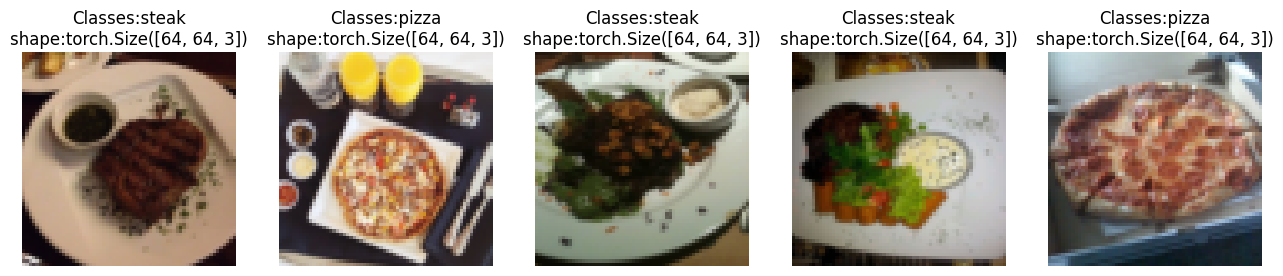

In [47]:
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

For display purposes, n should not be larger than 10


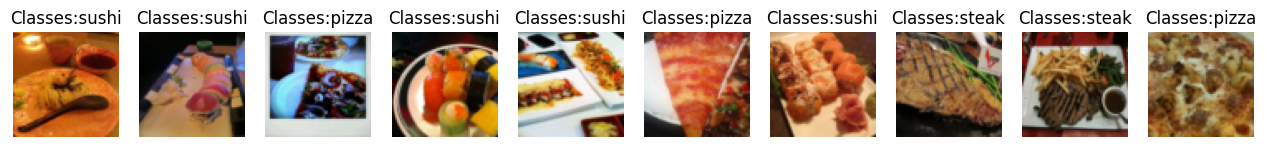

In [48]:
display_random_images(train_data_custom,
                      n=12,
                      classes=class_names,
                      seed=None)

In [52]:
# data augmnetation
from torchvision import transforms
train_transform=transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform=transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()

])

In [53]:
image_path_list=list(image_path.glob('*/*/*.jpg'))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/pizza/3269634.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1660415.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/741883.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/739735.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/38349.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2687575.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1008844.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1285298.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/853441.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3109486.jpg')]

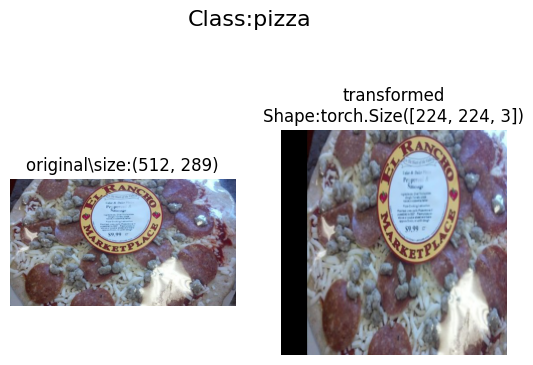

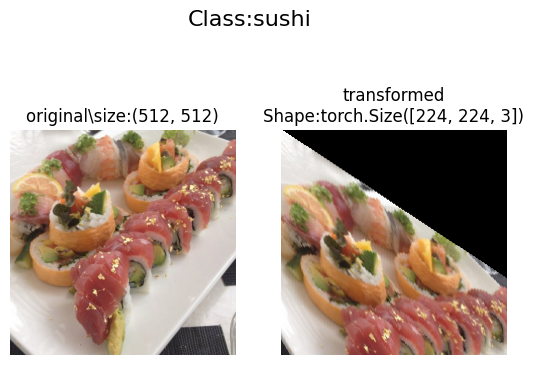

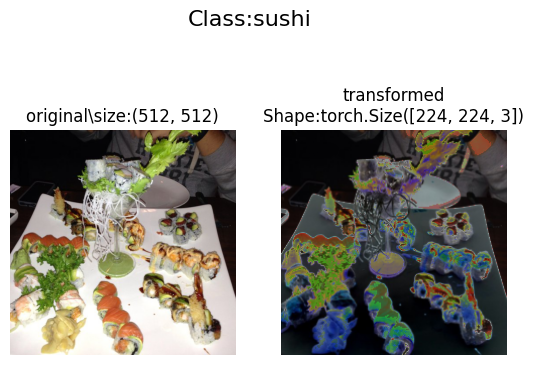

In [56]:
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transform,
    n=3,
    seed=None)

In [57]:
# create a simple transform
simple_transform=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [59]:
# loading and transforming data
from torchvision import datasets
train_data_simple=datasets.ImageFolder(
    root=train_dir,
    transform=simple_transform
)
test_data_simple=datasets.ImageFolder(
    root=test_dir,
    transform=simple_transform
)
# \changing data to Dataloader
import os
from torch.utils.data import DataLoader

#set up bath size
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()

# create dataloaders
train_dataloader_simple=DataLoader(
    dataset=train_data_simple,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)
test_dataloader_simple=DataLoader(
    dataset=test_data_simple,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS
)

In [125]:
## creatying a tinyngg model
class TinyVGG(nn.Module):
  def __init__(self,input_shape:int,
               hidden_units:int,
               output_shape:int)->None:
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2),
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2),
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16,
                  out_features=output_shape)             
    )

  def forward(self,x):
    x=self.conv_block_1(x)
    # print(x.shape)
    x=self.conv_block_2(x)
    # print(x.shape)
    x=self.classifier(x)
    # print(x.shape)
    return x


In [126]:
torch.manual_seed(42)
model_0=TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [127]:
image_batch,label_batch=next(iter(train_dataloader_simple))
image_batch.shape,label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [128]:
# try a forward pass
model_0(image_batch.to(device))

tensor([[0.0578, 0.0634, 0.0352],
        [0.0658, 0.0650, 0.0398],
        [0.0702, 0.0678, 0.0412],
        [0.0687, 0.0646, 0.0417],
        [0.0625, 0.0613, 0.0355],
        [0.0587, 0.0595, 0.0358],
        [0.0634, 0.0637, 0.0375],
        [0.0653, 0.0615, 0.0376],
        [0.0678, 0.0621, 0.0348],
        [0.0620, 0.0599, 0.0370],
        [0.0607, 0.0628, 0.0387],
        [0.0637, 0.0589, 0.0352],
        [0.0658, 0.0611, 0.0369],
        [0.0703, 0.0690, 0.0330],
        [0.0557, 0.0570, 0.0357],
        [0.0631, 0.0642, 0.0388],
        [0.0639, 0.0616, 0.0375],
        [0.0605, 0.0600, 0.0374],
        [0.0623, 0.0627, 0.0369],
        [0.0740, 0.0676, 0.0400],
        [0.0621, 0.0613, 0.0361],
        [0.0632, 0.0599, 0.0366],
        [0.0662, 0.0627, 0.0334],
        [0.0638, 0.0622, 0.0394],
        [0.0670, 0.0666, 0.0363],
        [0.0650, 0.0601, 0.0405],
        [0.0639, 0.0597, 0.0395],
        [0.0733, 0.0687, 0.0412],
        [0.0697, 0.0631, 0.0402],
        [0.062

### use `torchinfo`

In [129]:
# Install torchinfo
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
from torchinfo import summary
summary(model_0,input_size=[32,3,64,64])

/usr/local/lib/python3.9/dist-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/usr/local/lib/python3.9/dist-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

# create train and test loop fnctions

In [140]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [141]:
# create a test loop
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

    

### Creating a train() function

In [142]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

## Train and evaluate the model


In [150]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1078 | train_acc: 0.2578 | test_loss: 1.1360 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0847 | train_acc: 0.4258 | test_loss: 1.1620 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1157 | train_acc: 0.2930 | test_loss: 1.1697 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0956 | train_acc: 0.4141 | test_loss: 1.1386 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0985 | train_acc: 0.2930 | test_loss: 1.1429 | test_acc: 0.1979
Total training time: 8.656 seconds


### Plotting thr loss curves of model 0

In [152]:
# get thr model_o_results
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [153]:
def plot_loss_curves(results:Dict[str,list[float]]):
  # get the oss values of loss dictionary
  loss=results['train_loss']
  test_loss=results['test_loss']

  accuracy=results['train_acc']
  test_accuracy=results['test_acc']

  epochs=range(len(results['train_loss']))
  plt.subplot(1,2,1)
  plt.plot(epochs,loss,label='train_loss')
  plt.plot(epochs,test_loss,label='test_loss')
  plt.title('loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs,accuracy,label='train_accuracy')
  plt.plot(epochs,test_accuracy,label='test_accuracy')
  plt.title('accuracy')
  plt.xlabel('Epochs')
  plt.legend()


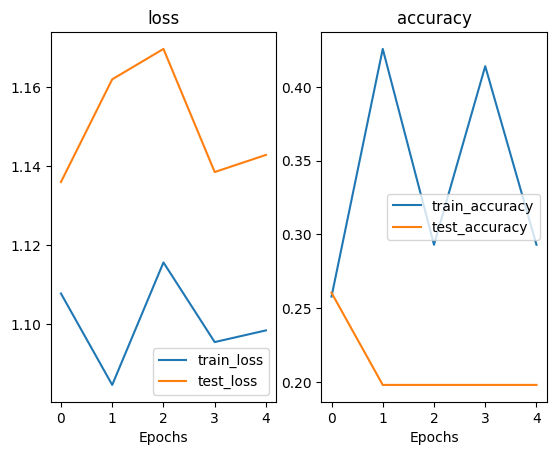

In [154]:
plot_loss_curves(model_0_results)